In [1]:
import numpy as np
import crflux.models as pm

In [2]:
path = '/data/user/khymon/cs-analysis/'
flux = np.load(path + 'mu_0.5pion_1.0kaon_10000.0_const_SIBYLL2.3c_mceqflux.npy')

In [3]:
flux.shape

(2, 73, 121)

In [4]:
flux[0][20]

array([ 1.18777279e-03,  1.29784171e-03,  1.40795141e-03,  1.51009528e-03,
        1.60147183e-03,  1.67835353e-03,  1.73538201e-03,  1.76248106e-03,
        1.75528808e-03,  1.70616269e-03,  1.61166493e-03,  1.47214392e-03,
        1.29592946e-03,  1.09501686e-03,  8.87672985e-04,  6.89121406e-04,
        5.11891075e-04,  3.62976553e-04,  2.46722777e-04,  1.62451742e-04,
        1.04891324e-04,  6.58749431e-05,  3.96865870e-05,  2.34114332e-05,
        1.34106582e-05,  7.49777827e-06,  4.10020638e-06,  2.19983416e-06,
        1.15950694e-06,  6.00270784e-07,  3.05396964e-07,  1.52906158e-07,
        7.51177037e-08,  3.62664862e-08,  1.72790367e-08,  8.13368721e-09,
        3.78940324e-09,  1.74921665e-09,  8.00530681e-10,  3.63460164e-10,
        1.63901100e-10,  7.34664563e-11,  3.27296747e-11,  1.45040782e-11,
        6.39784873e-12,  2.81018468e-12,  1.22856668e-12,  5.34701875e-13,
        2.31804080e-13,  1.04730169e-13,  5.00784131e-14,  2.38310809e-14,
        1.01966614e-14,  

In [5]:
# mceq energy grid
from MCEq.core import MCEqRun
mceq = MCEqRun(
            interaction_model="SIBYLL2.3c",
            theta_deg=0.0,
            primary_model=(pm.HillasGaisser2012, "H3a"),
        )

energy = mceq.e_grid

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('BK_USStd', None)
MCEqRun::set_primary_model(): HillasGaisser2012 H3a


In [6]:
e_gev = energy[11:21]

In [7]:
flux_year = np.mean(flux[0,:,11:21],axis=0)

In [8]:
np.mean(flux[0,:,11:21],axis=0)

array([0.00144137, 0.00126882, 0.0010726 , 0.00087027, 0.00067632,
       0.00050287, 0.00035689, 0.00024284, 0.00016014, 0.00010356])

In [47]:
sv = flux[0,:,11:21]/flux_year

In [10]:
sv.shape

(73, 10)

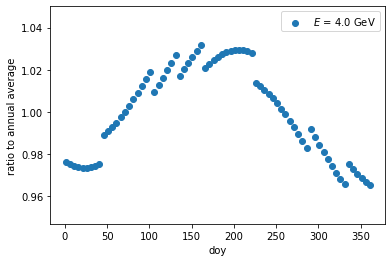

In [48]:
# plot seasonal variation of GeV muon flux
from utils.helpers import *
import matplotlib.pyplot as plt
doy = doys(5)

plt.scatter(doy,sv[:,4],label = '$E$ = ' + str(np.round(energy[16])) + ' GeV')
plt.ylabel('ratio to annual average')
plt.xlabel('doy')
plt.legend()
plt.savefig('/home/khymon/Plots/cs-analysis/gevmuon_doy_sv_0.5pion.png')

In [34]:
flux[0,28,12]

0.0013639082548990646

plot flux for different days

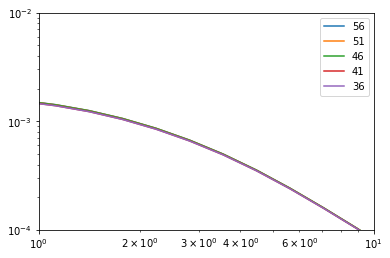

In [33]:
plt.plot(energy,flux[0,11],label = str(doy[11]))
plt.plot(energy,flux[0,10],label = str(doy[10]))
plt.plot(energy,flux[0,9],label = str(doy[9]))
plt.plot(energy,flux[0,8],label = str(doy[8]))
plt.plot(energy,flux[0,7],label = str(doy[7]))
plt.xscale('log')
plt.yscale('log')
plt.xlim(1e0,1e1)
plt.ylim(1.e-4,1.e-2)
plt.legend()

In [38]:
flux[0,9,11:21]/flux[0,10,11:21]

array([0.99792747, 0.99800434, 0.99809818, 0.99821023, 0.99834244,
       0.99849756, 0.99867735, 0.99887244, 0.99906772, 0.99924322])

In [49]:
# plot GeV muons untuned flux
flux = np.load(path + 'mu_1.0pion_1.0kaon_10000.0_const_SIBYLL2.3c_mceqflux.npy')
flux_year = np.mean(flux[0,:,11:21],axis=0)
sv = flux[0,:,11:21]/flux_year

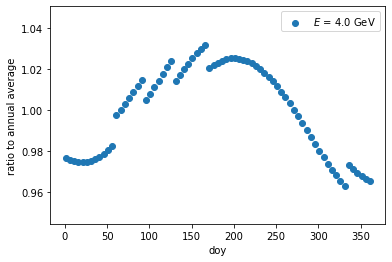

In [50]:
plt.scatter(doy,sv[:,4],label = '$E$ = ' + str(np.round(energy[16])) + ' GeV')
plt.ylabel('ratio to annual average')
plt.xlabel('doy')
plt.legend()
plt.savefig('/home/khymon/Plots/cs-analysis/gevmuon_doy_sv_untuned.png')